<a href="https://colab.research.google.com/github/oprostep/2024-Fall-ML/blob/main/0929_Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 202104591 김하준

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model

In [2]:
targetUrl = "https://raw.githubusercontent.com/oprostep/2024-Fall-ML/main/concrete_data.csv"

df = pd.read_csv(targetUrl, sep=',')

df = df.rename(columns = {'blast_furnace_slag': 'slag', 'concrete_compressive_strength': 'strength'})

df.head()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


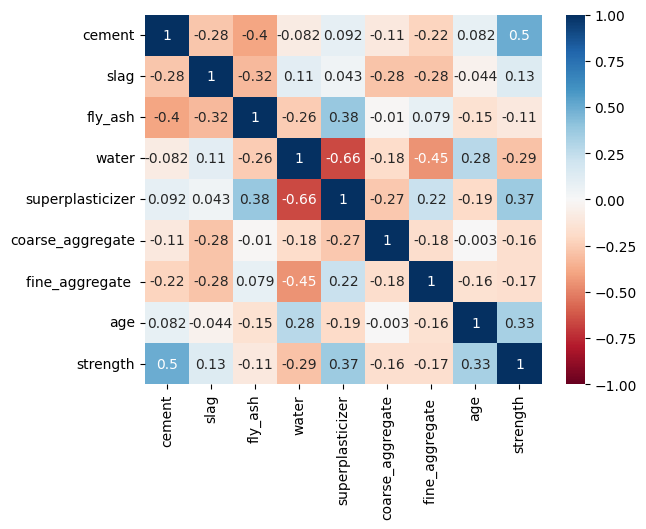

In [3]:
# Correlation matrix
matrix = df.iloc[:, 0:9].corr()

sns.heatmap(matrix,annot=True,vmax = 1,vmin = -1,center = 0,cmap = 'RdBu');

In [4]:
X = np.array(df.iloc[:, range(0,7)])
y = np.array(df['strength']).reshape((-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[155.21951992389472, 135.18847835135105, 123.7378103851779, 112.48921657362881, 111.0708437528075]
[159.23113817632935, 147.08534461842578, 153.9967456147509, 154.09261290610354, 243.7964605303618]


Text(0.5, 1.0, 'MSE VS Degree')

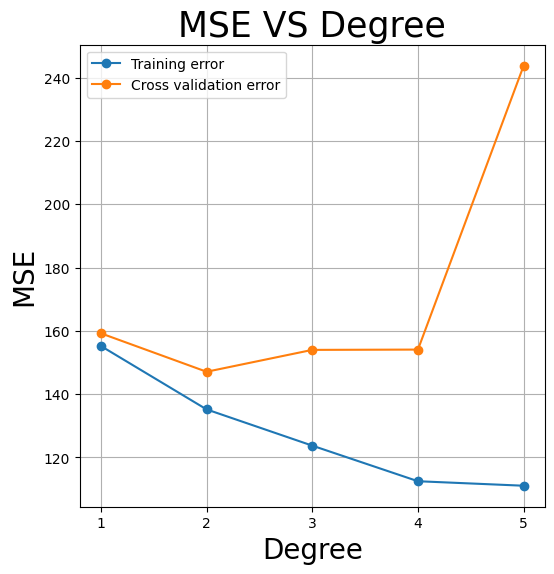

In [5]:
maxdegree = 5
training_error=[]
cross_validation_error=[]

for d in range(1,maxdegree+1):
    poly = PolynomialFeatures(degree=d,include_bias=False,interaction_only=True)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    lr=LinearRegression(fit_intercept=False)
    model=lr.fit(X_poly_train,y_train)

    y_train_pred=model.predict(X_poly_train)

    mse_train=mean_squared_error(y_train,y_train_pred)
    training_error.append(mse_train)

    cve=cross_validate(lr,X_poly_train,y_train,scoring='neg_mean_squared_error',cv=5,return_train_score=True)
    cross_validation_error.append(np.mean(np.absolute(cve['test_score'])))

print(training_error)
print(cross_validation_error)

fig,ax=plt.subplots(figsize=(6,6))
plt.xticks([1,2,3,4,5])
ax.plot(range(1,maxdegree+1),training_error,label='Training error',marker='o')
ax.plot(range(1,maxdegree+1),cross_validation_error,label='Cross validation error',marker='o')
plt.legend()
plt.grid(True)
ax.set_xlabel('Degree',fontsize=20)
ax.set_ylabel('MSE',fontsize=20)
ax.set_title('MSE VS Degree',fontsize=25)